In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
spotify_data = pd.read_csv('top5genres2020_2022.csv')

In [7]:
spotify_data.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,100,2020,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,92,2020,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,91,2020,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,90,2020,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
4,90,2020,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4


In [37]:
corr = spotify_data.corrwith(spotify_data['popularity']).sort_values()

In [38]:
corr

speechiness        -1.652182e-01
danceability       -1.561766e-01
energy             -1.209487e-01
valence            -1.145004e-01
loudness           -1.058174e-01
time_signature     -7.476649e-02
duration_ms        -3.250055e-02
key                -2.634224e-02
liveness           -1.968855e-02
instrumentalness   -9.642560e-03
year                6.286506e-17
mode                4.661961e-02
acousticness        4.665133e-02
tempo               8.821618e-02
popularity          1.000000e+00
dtype: float64

In [39]:
corr.index

Index(['speechiness', 'danceability', 'energy', 'valence', 'loudness',
       'time_signature', 'duration_ms', 'key', 'liveness', 'instrumentalness',
       'year', 'mode', 'acousticness', 'tempo', 'popularity'],
      dtype='object')

It looks like speechiness, danceability, energy, valence, and loudness have the highest (albeit quite low) correlation with popularity from the sample data (also negative in correlation too)

In [ ]:
# variable distributions

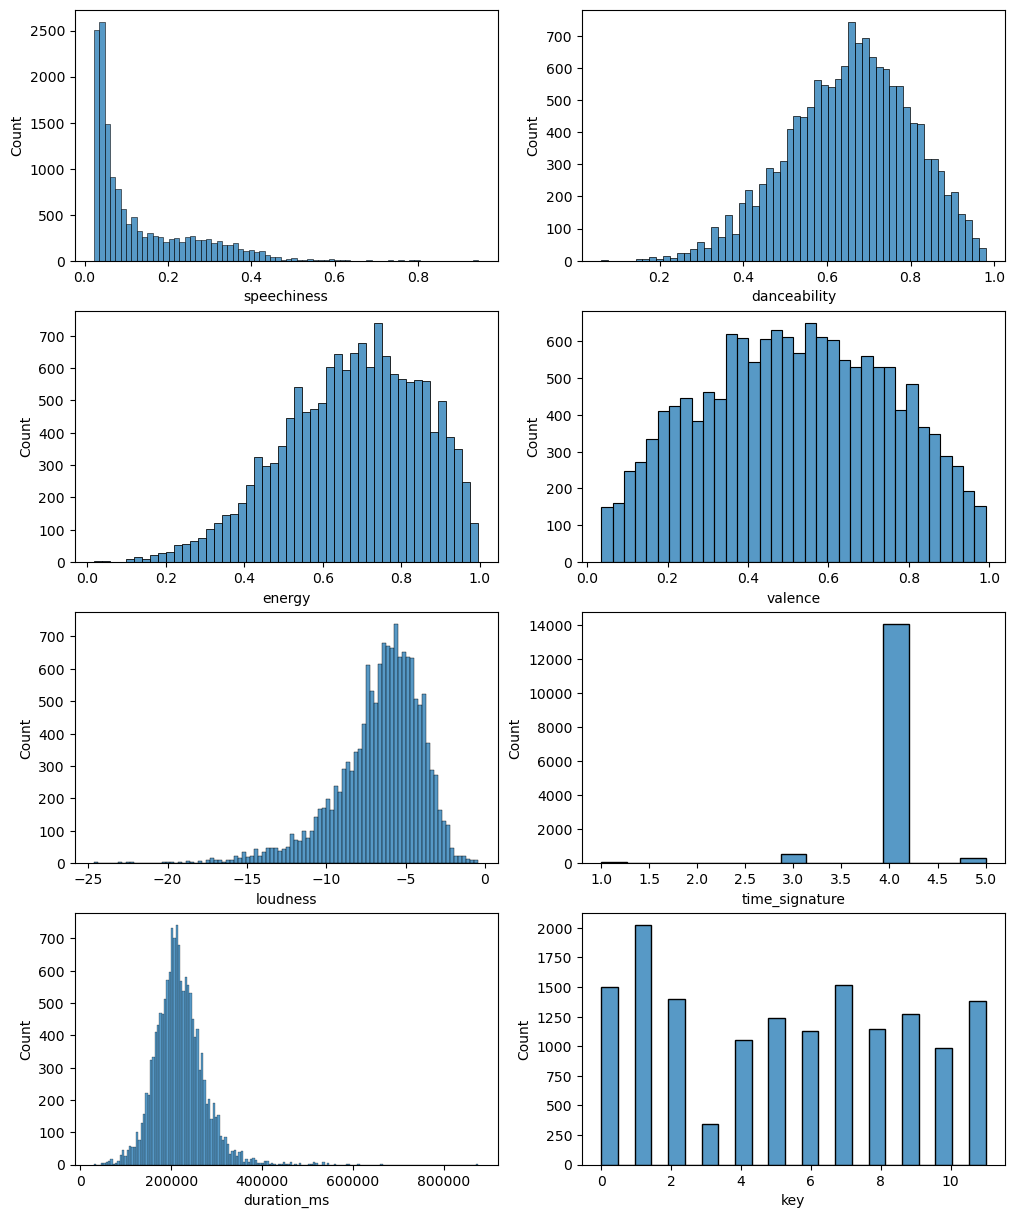

In [62]:
predictors1 = list(corr.index)[:8]
fig, axes = plt.subplots(4,2,figsize=(12,15))
p = 0
for i in range(4):
    for j in range(2):
    
        if p >= 8:
            break
        predictor = predictors1[p]
        
        sns.histplot(ax=axes[i,j], x=predictor,data=spotify_data)
        p+=1
plt.show()

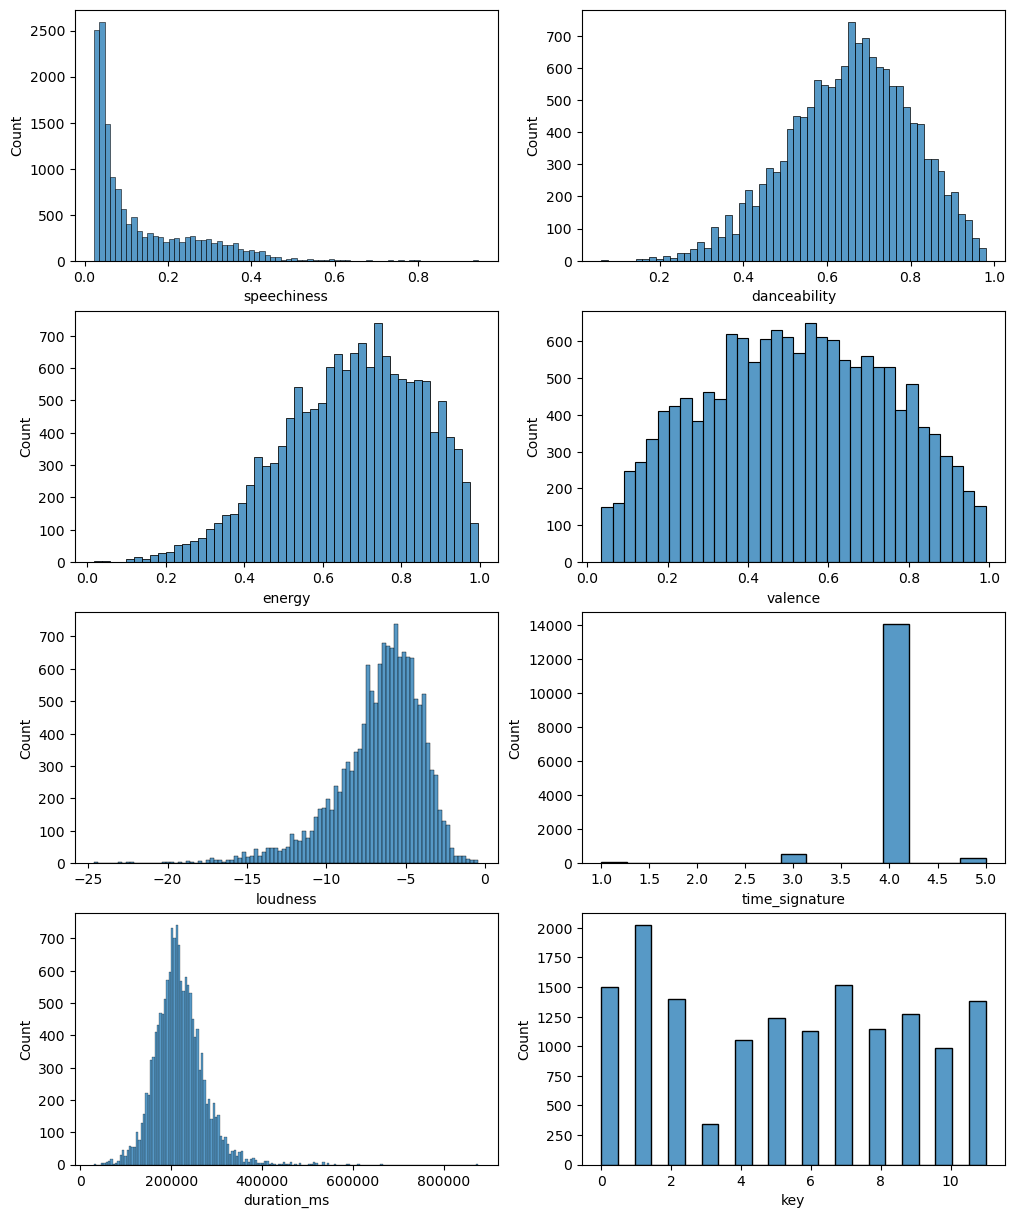

In [63]:
predictors2 = list(corr.index)[8:15]
fig, axes = plt.subplots(4,2,figsize=(12,15))
p = 0
for i in range(4):
    for j in range(2):
    
        if p >= 8:
            break
        predictor = predictors1[p]
        
        sns.histplot(ax=axes[i,j], x=predictor,data=spotify_data)
        p+=1
plt.show()

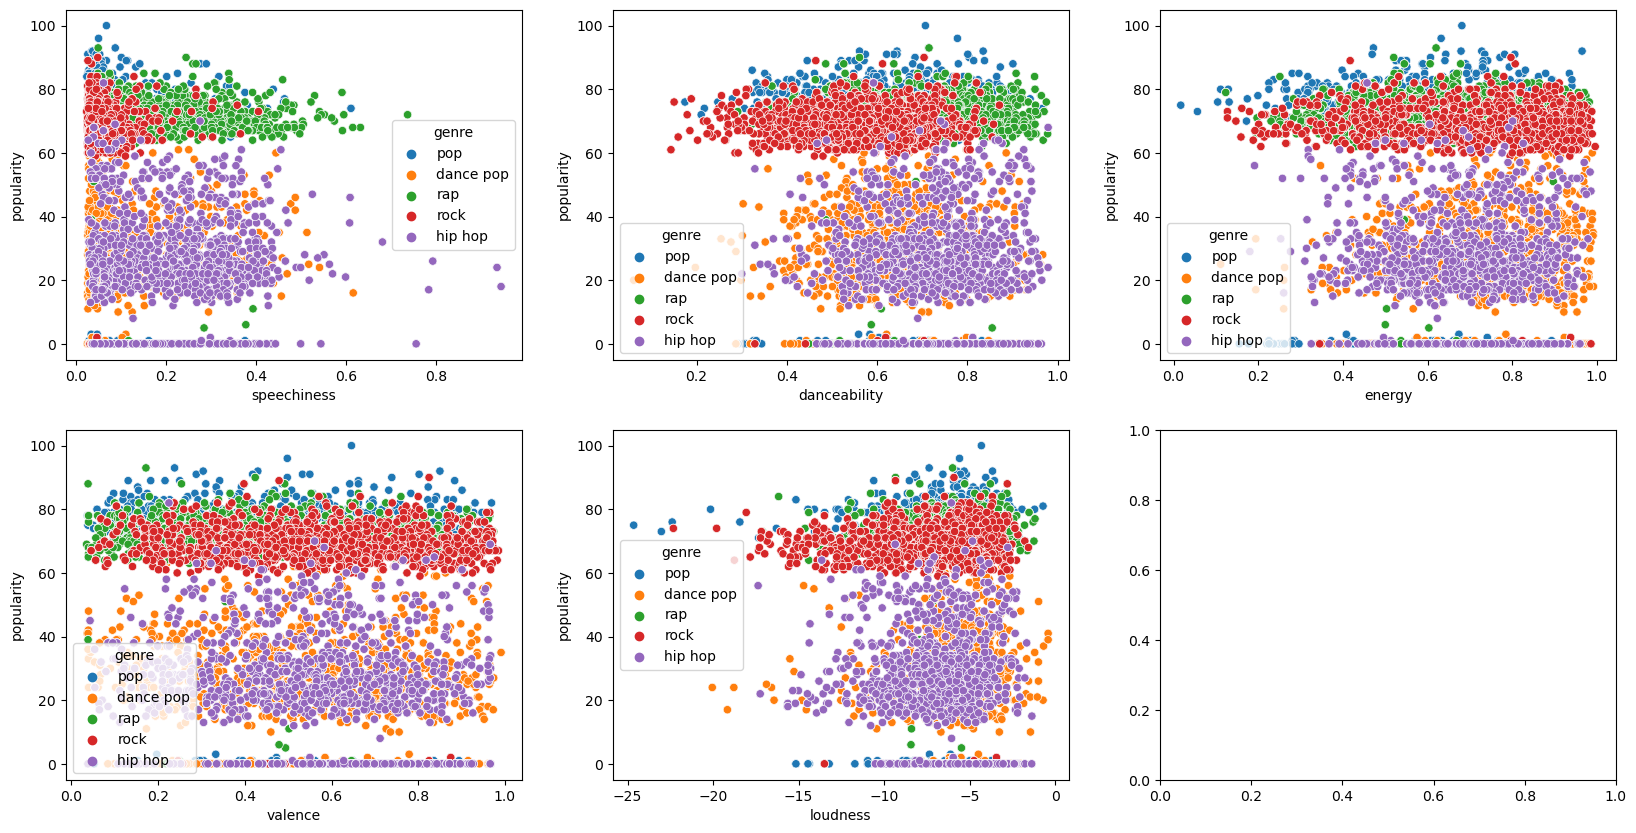

In [64]:
predictors = ['speechiness','danceability','energy','valence','loudness']
fig, axes = plt.subplots(2,3,figsize=(20,10))
p = 0
for i in range(2):
    for j in range(3):
        
        if p >= 5:
            break
        predictor = predictors[p]
        
        sns.scatterplot(ax=axes[i,j], x=predictor,y='popularity',data=spotify_data,hue='genre')
        p+=1
plt.show()

In [36]:
spotify_data.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,50.317278,2021.000000,0.654313,0.675154,5.290060,-6.619920,0.610207,0.131545,0.181390,0.024518,0.186758,0.518572,120.696349,218959.461975,3.974783
std,27.622066,0.816796,0.146652,0.173836,3.614531,2.711861,0.487720,0.121979,0.217601,0.114426,0.142140,0.230509,28.766064,56876.965087,0.305668
min,0.000000,2020.000000,0.060400,0.016700,0.000000,-24.639000,0.000000,0.022700,0.000008,0.000000,0.019000,0.035200,60.014000,30048.000000,1.000000
25%,26.000000,2020.000000,0.557000,0.554000,2.000000,-7.899000,0.000000,0.041000,0.020400,0.000000,0.095600,0.345000,97.400000,184130.750000,4.000000
50%,66.000000,2021.000000,0.664000,0.689500,5.000000,-6.171000,1.000000,0.074050,0.090400,0.000000,0.129000,0.522000,119.979000,214148.000000,4.000000
75%,73.000000,2022.000000,0.761000,0.810000,8.000000,-4.767000,1.000000,0.200000,0.266000,0.000173,0.245000,0.699000,138.978000,247573.000000,4.000000
max,100.000000,2022.000000,0.979000,0.996000,11.000000,-0.424000,1.000000,0.945000,0.990000,0.988000,0.943000,0.991000,244.613000,876000.000000,5.000000


In [ ]:
# no missing values
# for the loudness col, the closer the value is to zero, the louder it is